In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [220]:
sns.set_style('whitegrid')

In [175]:
portfolio3 = pd.read_csv('dados/df_portfolio3.csv')
portfolio1 = pd.read_csv('dados/df_portfolio1.csv')
portfolio2 = pd.read_csv('dados/df_portfolio2.csv')
market = pd.read_csv('dados/market_clean_enconded.csv')
df_coordenada = pd.read_csv('dados/coord_geograficas_brasil.csv')
market_aux = pd.read_csv('dados/estaticos_market.csv')

In [176]:
df_coordenada.rename({'lng':'longitude','lat':'latitude'},axis=1, inplace=True)

In [177]:
df_coordenada.head()

,nm_uf,nm_micro,longitude,latitude
0,SAO PAULO,ADAMANTINA,-50.997688,-21.706115
1,ESPÍRITO SANTO,AFONSO CLAUDIO,-41.018390,-20.191878
2,MARANHÃO,AGLOMERACAO URBANA DE SAO LUIS,-44.142982,-2.562962
3,SERGIPE,AGRESTE DE ITABAIANA,-37.411976,-10.729138
4,SERGIPE,AGRESTE DE LAGARTO,-37.680786,-10.921736


In [178]:
portfolio2.shape

(566, 41)

In [179]:
portfolio1.shape

(555, 41)

In [180]:
portfolio3.shape

(265, 41)

In [181]:
portfolio1 = portfolio1.drop(['Unnamed: 0'], axis = 1)
portfolio2 = portfolio2.drop(['Unnamed: 0'], axis = 1)
portfolio3 = portfolio3.drop(['Unnamed: 0'], axis = 1)
market = market.drop(['Unnamed: 0'], axis = 1)
market_aux = market_aux.drop(['Unnamed: 0'], axis = 1)

In [182]:
market_aux = market_aux.merge(df_coordenada, how='left',left_on='nm_micro_regiao',right_on='nm_micro')

In [183]:
market_aux.columns

Index(['id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat', 'fl_me',
       ...
       'qt_funcionarios_12meses', 'qt_funcionarios_24meses',
       'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
       'qt_filiais', 'nm_uf', 'nm_micro', 'longitude', 'latitude'],
      dtype='object', length=185)

In [184]:
market_aux = market_aux[['id','nm_micro_regiao','latitude','longitude']]

In [12]:
market_aux.isna().sum()

id                     0
nm_micro_regiao    58698
latitude           58698
longitude          58698
dtype: int64

In [185]:
market_aux = market_aux.dropna()

In [186]:
market_aux.shape

(410837, 4)

In [187]:
market_aux= market_aux.dropna()

In [188]:
market_noID = market.copy()

In [189]:
market_noID.drop('id',axis=1,inplace=True)

In [190]:
market_noID.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
0,0.468908,-0.049577,-0.040442,-0.218332,3.206583e-14,0.177374,0.128755,0.0,0.077506,-0.048349,...,32,10,19,4,0,0,6,48,2,2
1,-0.882484,-0.049577,-0.040442,-1.741135,-8.700907e-01,-0.174786,-1.571173,0.0,-0.019695,-0.048772,...,3,3,16,2,1,1,4,69,10,10
2,-0.296966,-0.049577,-0.040442,0.107983,-6.164806e-01,-0.174786,-1.071194,0.0,-0.025017,-0.048795,...,86,20,2,0,0,2,2,43,1,1
3,-0.357370,-0.049577,-0.040442,0.107983,-8.630394e-01,-0.174786,-0.671211,0.0,-0.019695,-0.048772,...,74,17,2,0,0,2,2,43,10,10
4,-0.701843,-0.049577,-0.040442,0.216755,1.623920e+00,-0.174786,0.010406,0.0,-0.019695,-0.048772,...,77,8,19,4,0,0,6,48,10,10


In [191]:
market_noID.shape

(462298, 39)

## Modelo com o KMeans

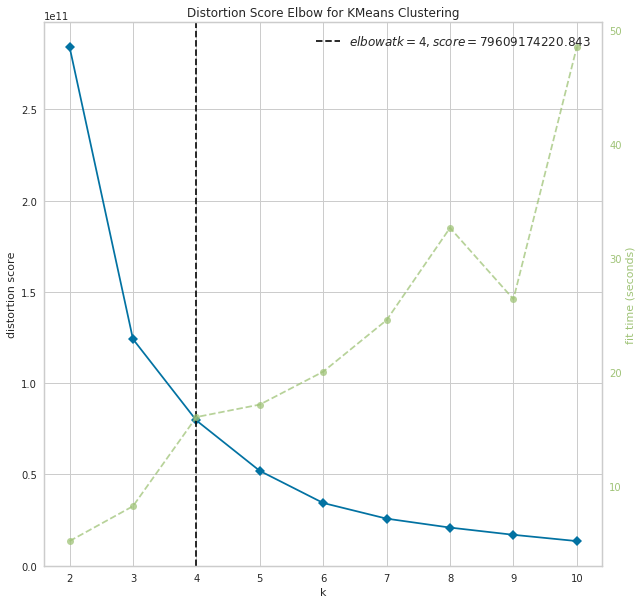

In [15]:
model = KMeans()
plt.figure(figsize=(10,10))

visualizer = KElbowVisualizer(model)
visualizer.fit(market_noID)    


sns.set_style('whitegrid')
# Fit the data to the visualizer
visualizer.show() 

In [192]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10)
km = km.fit(market_noID)

In [193]:
y_pred = km.predict(market_noID)

pd.DataFrame(y_pred)[0].value_counts()

0    144108
3    122143
1    102261
2     93786
Name: 0, dtype: int64

In [194]:
#Criando uma coluna com os resultados das predições
X_train = market_noID.copy()
X_train['km'] = km.predict(market_noID)

In [195]:
#verificando se a coluna foi criada
X_train.shape

(462298, 40)

In [196]:
y_pred_1 = km.predict(portfolio1.drop('id',axis=1))
y_pred_2 = km.predict(portfolio2.drop('id',axis=1))
y_pred_3 = km.predict(portfolio3.drop('id',axis=1))

In [197]:
pd.DataFrame(y_pred_1)[0].value_counts()

0    173
3    139
1    124
2    119
Name: 0, dtype: int64

In [198]:
pd.DataFrame(y_pred_2)[0].value_counts()

0    557
2      8
3      1
Name: 0, dtype: int64

In [199]:
pd.DataFrame(y_pred_3)[0].value_counts()

0    229
2     21
1     11
3      4
Name: 0, dtype: int64

In [200]:
d = km.transform(market_noID)[:, 0]
ind = np.argsort(d)[::][:200]

In [201]:
clusters1_market = market_noID.loc[ind]

In [202]:
clusters1_market['id'] = market['id']

In [203]:
clusters1_market.shape

(200, 40)

## Removendo ids iguais

In [204]:
clusters1_market.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,id
399386,0.356078,-0.049577,-0.039611,2.392188,3.206583e-14,2.345859e-16,0.010406,0.0,-0.019695,-0.048772,...,10,9,0,0,2,3,44,10,10,4ee92d6e7359ca83b7bf7f5163e01c73cc799abf2ed5c8...
285407,1.168395,-0.049577,-0.040442,-0.327103,-2.691290e-01,2.345859e-16,0.010406,0.0,-0.008173,-0.048722,...,9,16,3,0,1,9,38,7,7,99ed66311f37e91efabb969d286ef2ec2bdedeb05ccdb3...
430576,1.852212,-0.049577,-0.040442,-0.109560,-9.726257e-01,-1.747865e-01,1.128713,0.0,-0.019695,-0.048772,...,9,9,3,0,1,8,37,10,10,4e5def212d0296e1971265fb40008f426096208b0859c3...
61063,0.355224,-0.049577,-0.040442,-0.218332,3.206583e-14,2.345859e-16,0.010406,0.0,-0.019695,-0.048772,...,9,16,3,0,1,9,38,10,10,925aa7b2a4cf24d6bfac49ef9688e4bfac69831b646274...
181114,0.668070,-0.049577,-0.040442,-0.218332,3.206583e-14,2.345859e-16,0.010406,0.0,-0.019695,-0.048772,...,9,9,1,0,2,3,44,10,10,929259c9a8e2e479bdaa03599b7dc83beeba4cb2832741...


In [205]:
merge_not1 = clusters1_market[~clusters1_market['id'].isin(portfolio1['id'])]

In [206]:
portfolio1.shape

(555, 40)

In [207]:
# clientes para serem recomendados
merge_not1.shape

(199, 40)

In [208]:
merge_not2 = clusters1_market[~clusters1_market['id'].isin(portfolio2['id'])]

In [209]:
merge_not2.shape

(200, 40)

In [210]:
merge_not3 = clusters1_market[~clusters1_market['id'].isin(portfolio3['id'])]

In [211]:
merge_not3.shape

(200, 40)

## Concatenando o portfólio com os novos clientes

In [212]:
port1_semclientesnovos = portfolio1.copy()
port2_semclientesnovos = portfolio2.copy()
port3_semclientesnovos = portfolio3.copy()

In [213]:
port1_semclientesnovos['cliente'] = 'Clientes'
port2_semclientesnovos['cliente'] = 'Clientes'
port3_semclientesnovos['cliente'] = 'Clientes'

In [214]:
port1_semclientesnovos.head()

,id,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,cliente
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,-0.967391,-0.049577,-0.040442,3.864345e-16,-0.962349,-1.747865e-01,0.228751,0.000000,-0.019695,...,9,16,2,4,1,14,61,10,10,Clientes
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,-0.349677,-0.049577,-0.040442,-3.271032e-01,0.578215,2.345859e-16,0.010406,0.000000,-0.019695,...,9,9,4,0,2,3,44,10,7,Clientes
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,-0.201517,-0.049577,-0.040442,-1.095599e-01,-0.528733,-1.747865e-01,1.128713,-0.227621,-0.025017,...,9,9,1,0,2,8,0,1,1,Clientes
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,1.135059,-0.049577,-0.040442,1.079834e-01,-0.725393,-1.747865e-01,-0.271228,0.000000,-0.025017,...,9,19,4,0,0,11,70,1,1,Clientes
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,0.912819,-0.049577,-0.040442,-2.183315e-01,-0.443090,1.773739e-01,-0.971198,-0.227621,0.074079,...,9,19,4,0,0,6,48,2,8,Clientes


In [215]:
novos_clientes1 = merge_not1.copy()
novos_clientes2 = merge_not2.copy()
novos_clientes3 = merge_not3.copy()

In [216]:
novos_clientes.head()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,qt_socios_feminino,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,id
399386,0.356078,-0.049577,-0.039611,2.392188,3.206583e-14,2.345859e-16,0.010406,0.0,-0.019695,-0.048772,...,10,9,0,0,2,3,44,10,10,4ee92d6e7359ca83b7bf7f5163e01c73cc799abf2ed5c8...
61063,0.355224,-0.049577,-0.040442,-0.218332,3.206583e-14,2.345859e-16,0.010406,0.0,-0.019695,-0.048772,...,9,16,3,0,1,9,38,10,10,925aa7b2a4cf24d6bfac49ef9688e4bfac69831b646274...
285407,1.168395,-0.049577,-0.040442,-0.327103,-2.691290e-01,2.345859e-16,0.010406,0.0,-0.008173,-0.048722,...,9,16,3,0,1,9,38,7,7,99ed66311f37e91efabb969d286ef2ec2bdedeb05ccdb3...
430576,1.852212,-0.049577,-0.040442,-0.109560,-9.726257e-01,-1.747865e-01,1.128713,0.0,-0.019695,-0.048772,...,9,9,3,0,1,8,37,10,10,4e5def212d0296e1971265fb40008f426096208b0859c3...
181114,0.668070,-0.049577,-0.040442,-0.218332,3.206583e-14,2.345859e-16,0.010406,0.0,-0.019695,-0.048772,...,9,9,1,0,2,3,44,10,10,929259c9a8e2e479bdaa03599b7dc83beeba4cb2832741...


In [217]:
novos_clientes1['cliente'] = 'Recomendações'
novos_clientes2['cliente'] = 'Recomendações'
novos_clientes3['cliente'] = 'Recomendações'

In [218]:
port1_comcliente = pd.concat([port1_semclientesnovos,novos_clientes1 ],axis=0)
port2_comcliente = pd.concat([port2_semclientesnovos,novos_clientes2 ],axis=0)
port3_comcliente = pd.concat([port2_semclientesnovos,novos_clientes3 ],axis=0)

/home/luiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/home/luiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/home/luiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the curren

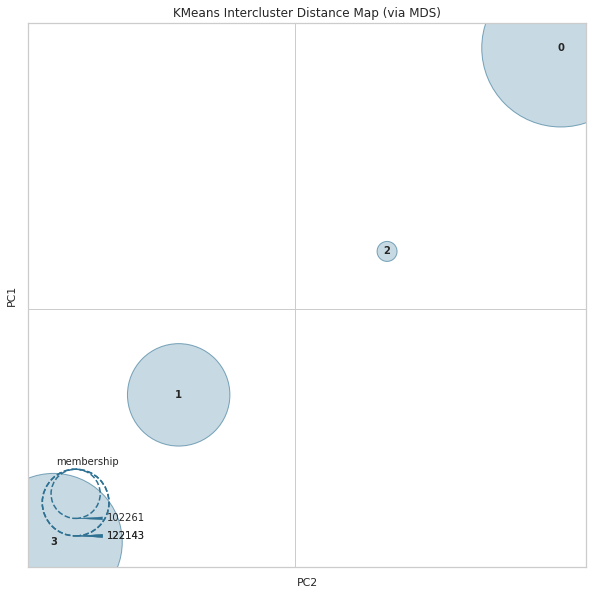

In [222]:
#Verificando as distancias entre os novos clusters criados
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance

model = KMeans(4)
plt.figure(figsize=(10,10))
visualizer = InterclusterDistance(model)
visualizer.fit(X_train)
sns.set_style('whitegrid')

visualizer.show()    

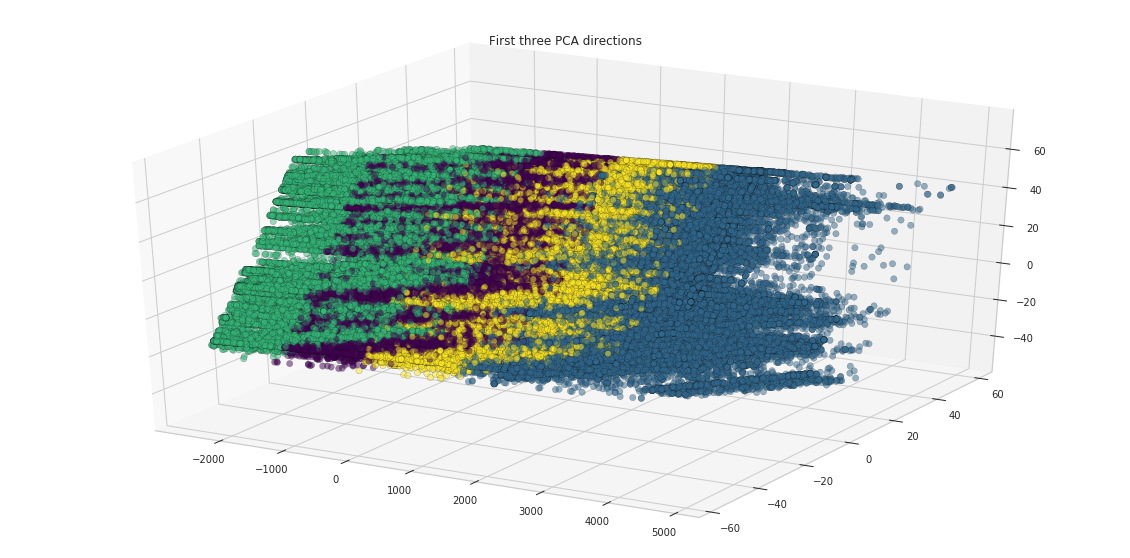

In [248]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


pca_ = PCA(n_components=3)
X_Demo_fit_pca = pca_.fit_transform(market_noID)

kmeans_PCA = KMeans(n_clusters=4)

y_kmeans_PCA = kmeans_PCA.fit_predict(X_Demo_fit_pca)
y_kmeans_PCA

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Demo_fit_pca[:,0],X_Demo_fit_pca[:,1],X_Demo_fit_pca[:,2], 
            c=y_kmeans_PCA, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)


ax.set_title("First three PCA directions")

ax.dist = 10

ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1], 
           kmeans_PCA.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

In [224]:
sample_market =market_noID.sample(frac = .01)

In [225]:
sample_market.shape

(4623, 39)

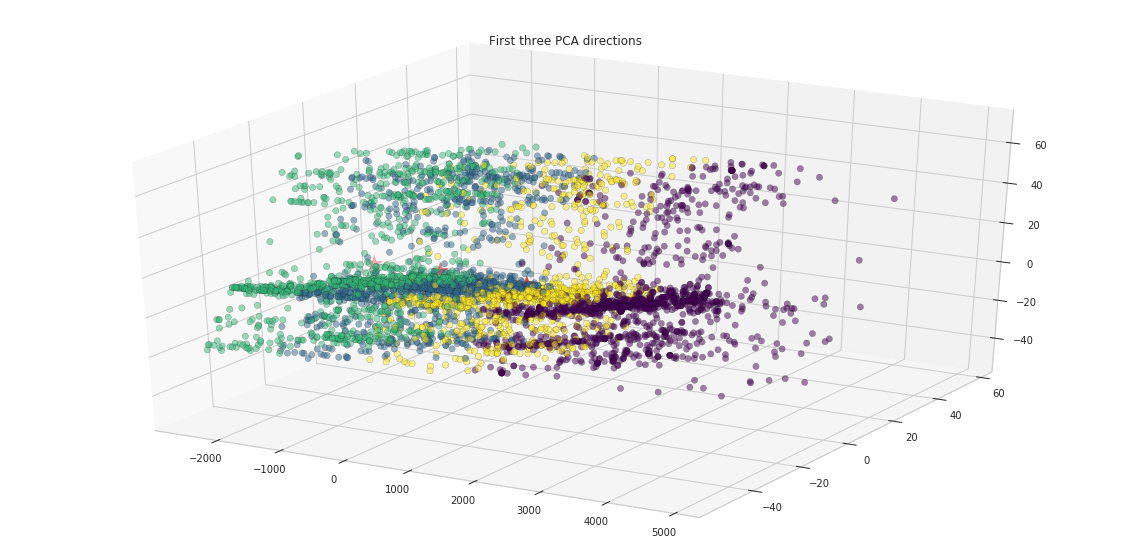

In [247]:
pca_ = PCA(n_components=3)
X_Demo_fit_pca = pca_.fit_transform(sample_market)

kmeans_PCA = KMeans(n_clusters=4)

y_kmeans_PCA = kmeans_PCA.fit_predict(X_Demo_fit_pca)
y_kmeans_PCA

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Demo_fit_pca[:,0],X_Demo_fit_pca[:,1],X_Demo_fit_pca[:,2], 
            c=y_kmeans_PCA, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)


ax.set_title("First three PCA directions")

ax.dist = 10

ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1], 
           kmeans_PCA.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

## Métrica

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
metrica_port1 = portfolio1.copy()

In [229]:
metrica_port1.set_index('id', inplace=True)

In [230]:
train, test = train_test_split(metrica_port1, test_size=0.20, random_state=42)

In [231]:
y_pred_metrica_port1 = km.predict(train)

In [232]:
pd.DataFrame(y_pred_metrica_port1)[0].value_counts()

0    142
3    110
2     99
1     93
Name: 0, dtype: int64

In [233]:
# Cria um dataframe para exibir os cluster que cada linha pertence
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X_train.index.values
#cluster_map['id'] = X_train.id
cluster_map['cluster'] = y_pred

In [234]:
cluster_map['id'] = market['id']

In [235]:
cluster_map_market_metrica = cluster_map[cluster_map['cluster'] ==0]

In [236]:
cluster_map_market_metrica.shape

(144108, 3)

In [237]:
test['id'] = test.index

/home/luiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [238]:
test.shape

(111, 40)

In [239]:
test.id.isin(cluster_map_market_metrica.id).value_counts()

False    80
True     31
Name: id, dtype: int64

# Mapas

In [240]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [241]:
market_aux.shape

(410837, 4)

In [242]:
def mapa(df):
    colors = {
     'Clientes': 'blue',
     'Recomendações': 'green'
    }

    mapa = folium.Map(
        location=[-7.9981267, -34.9082027],
        zoom_start=13
    )
    # I can add marker one by one on the map
    for i in range(0,len(df)):
        folium.Marker([df.iloc[i]['latitude'], df.iloc[i]['longitude']],\
                      popup = df.iloc[i]['cliente'],\
                      icon=folium.Icon(icon='ok',color=colors[df.iloc[i]['cliente']])).add_to(mapa)
    return mapa

In [243]:
mapa_port1 = mapa(port1_comcliente.iloc[0:round(len(portfolio1)*1.2)].merge(market_aux, how='left',left_on='id',right_on='id').dropna())
mapa_port1

In [244]:
mapa_port1.save('mapa_port1.html')

In [245]:
mapa(port2_comcliente.merge(market_aux, how='left',left_on='id',right_on='id').dropna())

In [246]:
mapa(port3_comcliente.merge(market_aux, how='left',left_on='id',right_on='id').dropna())